In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bbc-text.csv')

In [3]:
df.head()

,category,text
0,business,worldcom boss left books alone former worldc...
1,sport,tigers wary of farrell gamble leicester say ...
2,sport,yeading face newcastle in fa cup premiership s...
3,sport,henman hopes ended in dubai third seed tim hen...
4,sport,wilkinson fit to face edinburgh england captai...


In [5]:
df['category'].value_counts(normalize = True)

sport       0.50049
business    0.49951
Name: category, dtype: float64

In [6]:
df.loc[0, 'text']

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [7]:
df.loc[1, 'text']

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

## EDA 

In [11]:
pd.Series((' '.join(df['text']).split())).value_counts().head(25)

the     20447
to       9763
in       7949
a        7275
of       7175
and      6877
s        4218
for      3346
is       3083
it       2866
on       2843
that     2837
was      2338
has      2219
he       2182
i        2117
with     2112
at       2095
but      2038
have     1982
said     1843
be       1820
as       1764
by       1687
will     1680
dtype: int64

In [13]:
pd.Series((' '.join(df[df['category'] == 'sport']['text']).split())).value_counts().head(25)

the     9639
to      4695
a       3861
and     3678
in      3629
of      2800
s       2191
i       1992
for     1744
he      1727
on      1483
is      1479
but     1450
was     1423
it      1410
that    1244
with    1206
at      1170
have    1154
his     1148
we      1052
has      968
be       953
will     895
as       834
dtype: int64

In [14]:
pd.Series((' '.join(df[df['category'] == 'business']['text']).split())).value_counts().head(25)

the     10808
to       5068
of       4375
in       4320
a        3414
and      3199
s        2027
is       1604
for      1602
that     1593
it       1456
on       1360
said     1314
has      1251
its      1100
by       1095
as        930
at        925
was       915
with      906
be        867
from      857
have      828
are       808
will      785
dtype: int64

In [15]:
from nltk.corpus import stopwords 
stop = stopwords.words('english')

In [17]:
type(stop)

list

In [19]:
stop.append('s')

In [20]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
df['no_stop_words'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [23]:
df.loc[0, 'text']

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [24]:
df.loc[0, 'no_stop_words']

'worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing $11bn (£5.8bn) fraud never made accounting decisions witness told jurors. david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm shares. mr myers already pleaded guilty fraud assisting prosecutors. monday defence lawyer reid weingarten tried distance client allegations. cross examination asked mr myers ever knew mr ebbers make accounting decision . aware mr myers replied. ever know mr ebbers make accounting entry worldcom books mr weingarten pressed. replied witness. mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan. defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards. mr ebbers team meanwhile looking portray affable boss admission pe graduate ec

In [25]:
pd.Series(' '.join(df['no_stop_words']).split()).value_counts().head(25)

said       1843
-          1266
us          959
would       857
also        768
last        741
new         692
year        687
mr          615
first       599
world       598
two         579
one         578
said.       574
could       552
england     478
back        434
time        427
company     405
three       392
game        391
win         380
market      359
firm        353
made        350
dtype: int64

In [26]:
pd.Series(' '.join(df[df['category'] == 'sport']['no_stop_words']).split()).value_counts().head(25)

said       529
-          481
england    438
first      435
would      394
game       385
last       376
win        370
world      360
two        349
one        339
also       329
back       306
time       278
new        276
players    273
cup        271
play       268
six        244
good       244
side       244
ireland    243
second     241
could      241
wales      235
dtype: int64

In [27]:
pd.Series(' '.join(df[df['category'] == 'business']['no_stop_words']).split()).value_counts().head(25)

said          1314
-              785
us             781
mr             600
year           470
would          463
also           439
new            416
company        393
last           365
market         358
said.          344
growth         341
firm           339
government     327
bank           318
could          311
economic       310
economy        297
sales          291
oil            285
however        251
shares         247
may            243
one            239
dtype: int64

In [28]:
stop.append('-')

In [29]:
stop.append('said')

In [30]:
import string

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
df['no_stop_words'] = df['no_stop_words'].str.replace('[{}]'.format(string.punctuation), '')

In [33]:
pd.Series(' '.join(df['no_stop_words']).split()).value_counts().head(25)

said       2621
us         1022
year        904
would       859
also        769
last        741
new         701
world       631
mr          615
first       602
one         598
two         582
could       552
england     503
time        486
game        482
back        449
company     428
market      426
win         426
years       424
three       394
growth      384
firm        376
made        361
dtype: int64

In [35]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
df['no_stop_words'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [38]:
pd.Series(' '.join(df['no_stop_words']).split()).value_counts().head(25)

us         959
would      857
also       768
last       741
new        692
year       687
mr         615
first      599
world      598
two        579
one        578
said.      574
could      552
england    478
back       434
time       427
company    405
three      392
game       391
win        380
market     359
firm       353
made       350
since      342
growth     341
dtype: int64

In [39]:
df['no_stop_words'] = df['no_stop_words'].str.replace('[{}]'.format(string.punctuation), '')

In [40]:
df['no_stop_words'] = df['no_stop_words'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [41]:
pd.Series(' '.join(df['no_stop_words']).split()).value_counts().head(25)

us         1022
year        904
would       859
also        769
last        741
new         701
world       631
mr          615
first       602
one         598
two         582
could       552
england     503
time        486
game        482
back        449
company     428
market      426
win         426
years       424
three       394
growth      384
firm        376
made        361
economy     359
dtype: int64

In [42]:
pd.Series(' '.join(df[df['category'] == 'business']['no_stop_words']).split()).value_counts().head(25)

us            812
year          637
mr            600
would         463
also          440
market        425
new           416
company       415
growth        384
last          365
firm          362
economy       359
government    340
bank          335
sales         316
could         311
economic      310
2004          309
oil           294
shares        265
however       256
world         252
may           252
years         247
prices        246
dtype: int64

In [43]:
pd.Series(' '.join(df[df['category'] == 'sport']['no_stop_words']).split()).value_counts().head(25)

game       476
england    459
first      437
win        415
would      396
world      379
last       376
one        355
two        351
also       329
time       327
back       318
players    307
play       292
cup        290
new        285
side       270
ireland    270
year       267
team       265
wales      265
good       258
club       254
second     249
six        246
dtype: int64

In [44]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

(-0.5, 399.5, 199.5, -0.5)

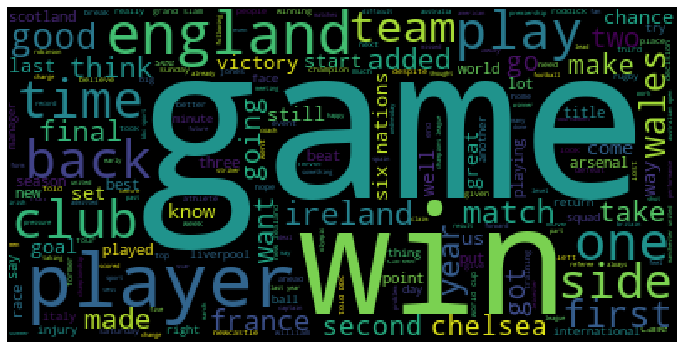

In [48]:
text = ' '.join(review for review in df[df['category'] == 'sport']['no_stop_words'])

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

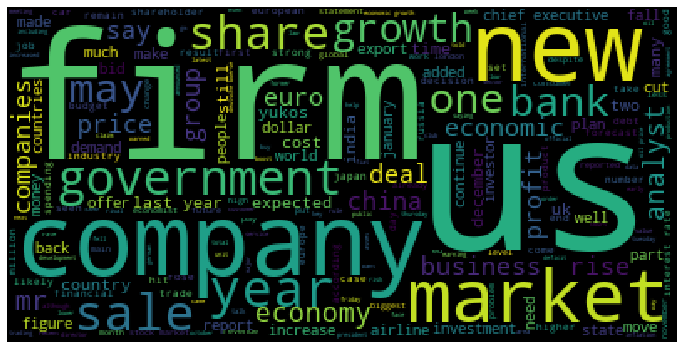

In [49]:
text = ' '.join(review for review in df[df['category'] == 'business']['no_stop_words'])

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis('off')

## Build our Model

In [50]:
df.head()

,category,text,no_stop_words
0,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
1,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
2,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
3,sport,henman hopes ended in dubai third seed tim hen...,henman hopes ended dubai third seed tim henman...
4,sport,wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain j...


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()

In [53]:
clf.fit(df['no_stop_words'], df['category'])

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing 11bn £58bn fraud never made accounting decisions witness told jurors david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems phone company collapsed 2002 prosecutors claim losses hidden protect firm shares mr myers already pleaded guilty fraud assisting prosecutors monday defence lawyer reid weingarten tried distance client allegations cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom books mr weingarten pressed replied witness mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards mr ebbers team meanwhile looking portray affable boss admission pe graduate economist whatever abilities mr ebbers transformed worldcom relative unknown 160bn telecoms giant investor darling late 1990s worldcom problems mounted however competition increased telecoms boom petered firm finally collapsed shareholders lost 180bn 20 000 workers lost jobs mr ebbers trial expected last two months found guilty former ceo faces substantial jail sentence firmly declared innocence'

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
countV = CountVectorizer()

In [56]:
bow = countV.fit_transform(df['no_stop_words'])

In [60]:
df_bow = pd.DataFrame(bow.toarray(), columns = countV.get_feature_names())

In [61]:
df_bow.head()

,00,000,000bn,000m,000seat,000seater,000strong,001,002,003,...,zoe,zoellick,zogbia,zola,zone,zones,zornotza,zuluaga,zurich,zvonareva
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_bow.shape

(1021, 19112)

In [63]:
clf.fit(df_bow, df['category'])

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
clf.score(df_bow, df['category'])

1.0

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df['no_stop_words'], df['category'])

In [67]:
X_train.shape

(765,)

In [68]:
X_train.head(2)

226    fuming robinson blasts officials england coach...
348    walmart fights back accusers two big us names ...
Name: no_stop_words, dtype: object

In [69]:
countV = CountVectorizer()

In [70]:
X_train_bow = countV.fit_transform(X_train)
X_test_bow = countV.transform(X_test)

In [72]:
clf.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
clf.score(X_train_bow, y_train)

1.0

In [74]:
clf.score(X_test_bow, y_test)

1.0

In [75]:
feature_to_coef = {
    word: coef for word, coef in zip(countV.get_feature_names(), clf.coef_[0])
}

In [77]:
clf.coef_[0]

array([ 4.65242086e-03, -1.53174634e-01, -1.48843011e-03, ...,
        5.91995663e-03,  2.46593964e-02,  1.48524620e-04])

In [80]:
clf.classes_

array(['business', 'sport'], dtype=object)

In [79]:
sorted(feature_to_coef.items(), key=lambda kv: kv[1])

[('mr', -0.4732372022241713),
 ('firm', -0.44612049284777666),
 ('bank', -0.4087218441712235),
 ('market', -0.37777168658747873),
 ('company', -0.3704026363598568),
 ('shares', -0.33978691118770776),
 ('us', -0.33457779837406776),
 ('government', -0.32520678279554044),
 ('sales', -0.24288093366404817),
 ('companies', -0.2350959617507446),
 ('financial', -0.22728459235080864),
 ('economy', -0.22155037393607974),
 ('oil', -0.21682934693863037),
 ('growth', -0.2133294361594004),
 ('2004', -0.21294327572164098),
 ('pay', -0.20041222534690417),
 ('economic', -0.19839557242254643),
 ('prices', -0.18939251862878564),
 ('firms', -0.17399217402827855),
 ('countries', -0.1689576247975773),
 ('business', -0.16790547057551375),
 ('japan', -0.16098013702067734),
 ('stock', -0.1597418059631345),
 ('demand', -0.15933491175392306),
 ('analysts', -0.1591421651735744),
 ('uk', -0.15874436814217424),
 ('investment', -0.158566087363591),
 ('price', -0.15747561746353372),
 ('rise', -0.15732459843337873),
 

In [81]:
sorted(feature_to_coef.items(), key=lambda kv: kv[1], reverse = True)

[('game', 0.37859289063770774),
 ('win', 0.3707752542429286),
 ('athletics', 0.353190964793355),
 ('cup', 0.32400717199958395),
 ('match', 0.3134855966590254),
 ('players', 0.2873888020459599),
 ('team', 0.2818846797983384),
 ('injury', 0.27642098999589404),
 ('season', 0.27466760482630515),
 ('champion', 0.2615236175301341),
 ('great', 0.25854035436249323),
 ('race', 0.25179375479671134),
 ('olympic', 0.2383200703860038),
 ('play', 0.23457854550754348),
 ('coach', 0.23432153736264333),
 ('chelsea', 0.22686706801799983),
 ('added', 0.22482635384640495),
 ('player', 0.21809017097564973),
 ('manager', 0.21341894186423527),
 ('side', 0.203935097871688),
 ('open', 0.20390351788772615),
 ('like', 0.19744023114939943),
 ('sport', 0.19649259252031104),
 ('international', 0.18490838931483908),
 ('second', 0.18380492714011085),
 ('championships', 0.18156820075786836),
 ('rugby', 0.18034250556119222),
 ('england', 0.17866576857670213),
 ('playing', 0.17675419309151397),
 ('got', 0.17375348857067